# **Project: Baggage Surveillance system**

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Uploading the file**

In [ ]:
bss = pd.read_csv('/content/drive/MyDrive/DS_47/BagTrack Report_MVXR.csv',encoding="unicode_escape")
bss.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BAG TRACKING REPORT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,BagID,MVXR,BHSID,L1 Decision,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime
1,5178,2,0312365478_0280SD,Reject,1/1/2020 0:16:19,Time out,32661,1/1/2020 0:16:46,Reject,32887,1/1/2020 0:16:54
2,5180,2,0312365545_0282SD,Reject,1/1/2020 0:19:28,Accept,32661,1/1/2020 0:19:41,-,-,-
3,5187,2,0312365871_0293SD,Reject,1/1/2020 0:24:39,Accept,32153,1/1/2020 0:24:44,-,-,-
4,5189,2,0312365971_0296SD,Reject,1/1/2020 0:28:31,Accept,32153,1/1/2020 0:28:42,-,-,-


**Changing column names & Reindexing**

In [ ]:
################# Changing header
new_header = bss.iloc[0]            # grab the first row for the header
bss = bss[1:]                       # take the data less the header row
bss.columns = new_header            # set the header row as the df header


################# Reindexing
bss.reset_index(inplace=True, drop=True)

In [ ]:
bss.head(5)

,BagID,MVXR,BHSID,L1 Decision,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime
0,5178,2,0312365478_0280SD,Reject,1/1/2020 0:16:19,Time out,32661,1/1/2020 0:16:46,Reject,32887,1/1/2020 0:16:54
1,5180,2,0312365545_0282SD,Reject,1/1/2020 0:19:28,Accept,32661,1/1/2020 0:19:41,-,-,-
2,5187,2,0312365871_0293SD,Reject,1/1/2020 0:24:39,Accept,32153,1/1/2020 0:24:44,-,-,-
3,5189,2,0312365971_0296SD,Reject,1/1/2020 0:28:31,Accept,32153,1/1/2020 0:28:42,-,-,-
4,5196,2,0312366152_0304SD,Reject,1/1/2020 0:33:42,Accept,32153,1/1/2020 0:33:47,-,-,-


**Renaming columns**

In [ ]:
bss = bss.rename(columns = {'L1 Decision ':'L1_Decision','Level1Decision ':'L1_Decision_Time','L2LoginID ':'L2_LoginID',
                            'L2Decision ':'L2_Decision','L2DecisionTime ':'L2_Decision_Time','L3Decision ':'L3_Decision','L3LoginID ':'L3_LoginID',
                            'L3DecisionTime ':'L3_Decision_Time'})

bss.columns

Index(['BagID', 'MVXR', 'BHSID', 'L1_Decision', 'L1_Decision_Time',
       'L2_Decision', 'L2_LoginID', 'L2_Decision_Time', 'L3_Decision',
       'L3_LoginID', 'L3_Decision_Time'],
      dtype='object', name=0)

**Seperating the Operators at L2 & L3 level**

In [ ]:
################## Seprating the L2 & L3 dataset

l2 = bss.iloc[:,0:8]

l31 = bss.iloc[:,0:3]
l32 = bss.iloc[:,5:12]

l3 = pd.concat([l31,l32],axis=1)

**L2 Operators datset**

In [ ]:
l2.head()

,BagID,MVXR,BHSID,L1_Decision,L1_Decision_Time,L2_Decision,L2_LoginID,L2_Decision_Time
0,5178,2,0312365478_0280SD,Reject,1/1/2020 0:16:19,Time out,32661,1/1/2020 0:16:46
1,5180,2,0312365545_0282SD,Reject,1/1/2020 0:19:28,Accept,32661,1/1/2020 0:19:41
2,5187,2,0312365871_0293SD,Reject,1/1/2020 0:24:39,Accept,32153,1/1/2020 0:24:44
3,5189,2,0312365971_0296SD,Reject,1/1/2020 0:28:31,Accept,32153,1/1/2020 0:28:42
4,5196,2,0312366152_0304SD,Reject,1/1/2020 0:33:42,Accept,32153,1/1/2020 0:33:47


**L3 operators dataset**

In [ ]:
l3.head()

,BagID,MVXR,BHSID,L2_Decision,L2_LoginID,L2_Decision_Time,L3_Decision,L3_LoginID,L3_Decision_Time
0,5178,2,0312365478_0280SD,Time out,32661,1/1/2020 0:16:46,Reject,32887,1/1/2020 0:16:54
1,5180,2,0312365545_0282SD,Accept,32661,1/1/2020 0:19:41,-,-,-
2,5187,2,0312365871_0293SD,Accept,32153,1/1/2020 0:24:44,-,-,-
3,5189,2,0312365971_0296SD,Accept,32153,1/1/2020 0:28:42,-,-,-
4,5196,2,0312366152_0304SD,Accept,32153,1/1/2020 0:33:47,-,-,-


# **L2 operators datset EDA**

In [ ]:
l2.shape

(1048574, 8)

**Null values**

In [ ]:
################## Null values
l2.isnull().sum()

0
BagID                   0
MVXR                    0
BHSID                   6
L1_Decision             0
L1_Decision_Time        0
L2_Decision             0
L2_LoginID          33283
L2_Decision_Time        0
dtype: int64

**Dropping Null values**

In [ ]:
################## Dropping Null values
l2 = l2.dropna()
l2.isnull().sum()

0
BagID               0
MVXR                0
BHSID               0
L1_Decision         0
L1_Decision_Time    0
L2_Decision         0
L2_LoginID          0
L2_Decision_Time    0
dtype: int64

**Datatypes**

In [ ]:
l2.dtypes

0
BagID               object
MVXR                object
BHSID               object
L1_Decision         object
L1_Decision_Time    object
L2_Decision         object
L2_LoginID          object
L2_Decision_Time    object
dtype: object

**Changing L2 datatype**

In [ ]:
################## Typecasting
l2.BagID = l2.BagID.astype('int64')
l2.MVXR = l2.MVXR.astype('int64')
l2.L2_LoginID = l2.L2_LoginID.astype('int64')
l2['L1_Decision_Time']= pd.to_datetime(l2['L1_Decision_Time'])
l2['L2_Decision_Time']= pd.to_datetime(l2['L2_Decision_Time'])

l2.dtypes

0
BagID                        int64
MVXR                         int64
BHSID                       object
L1_Decision                 object
L1_Decision_Time    datetime64[ns]
L2_Decision                 object
L2_LoginID                   int64
L2_Decision_Time    datetime64[ns]
dtype: object

**Unique values**

In [ ]:
unique_l2 = l2.apply(lambda col: col.unique())
unique_l2

0
BagID               [5178, 5180, 5187, 5189, 5196, 5198, 5201, 520...
MVXR                                                     [2, 3, 1, 4]
BHSID               [0312365478_0280SD, 0312365545_0282SD, 0312365...
L1_Decision                                               [Reject, -]
L1_Decision_Time    [2020-01-01T00:16:19.000000000, 2020-01-01T00:...
L2_Decision                [Time out, Accept, Reject, Default Reject]
L2_LoginID          [32661, 32153, 32648, 30921, 32878, 31230, 328...
L2_Decision_Time    [2020-01-01T00:16:46.000000000, 2020-01-01T00:...
dtype: object

**Dropping "-" from dataset**

In [ ]:
################## Removing "-" from the columns & checking unique values again
l2 = l2[l2.L1_Decision != '-']
l2.shape

(1012879, 8)

**Calculating operator 2 performance in seconds**

In [ ]:
################## L2 time
l2['Operator_L2_time'] = (l2['L2_Decision_Time'] - l2['L1_Decision_Time']).dt.seconds

**Creating Aircraft id feature**

In [ ]:
################## Fetching first 4 letters
l2['Aircraft_id'] = l2['BHSID'].astype(str).str[0:4]
################## Unique aircraft count
aircraft_count_l2 = l2.Aircraft_id.unique()
aircraft_count_l2.shape 

(154,)

**Unique aircraft codes**

In [ ]:
aircraft_count_l2

array(['0312', '0000', '0775', 'MVXR', '0001', '0098', '0879', '0057',
       '0807', '0777', '0228', '0157', '0235', '0668', '3607', '0176',
       '0232', '0999', '0100', '0217', '7607', '3098', '4016', '0016',
       '0514', '0712', '0486', '0319', '4589', '4910', '8006', '0322',
       '0229', '3589', '0160', '0672', '6001', '0603', '4555', '0065',
       '0117', '6016', '0771', '0125', '0260', '7910', '5006', '0222',
       '0072', '0314', '0043', '0080', '3807', '0388', '0030', '2879',
       '2514', '0313', '0357', '0755', '0086', '0382', '0220', '2000',
       '0279', '0790', '4816', '0316', '0618', '0075', '0141', '5629',
       '5016', '0285', '0523', '5607', '6607', '0055', '7027', '9511',
       '3910', '3016', '0909', '7705', '0787', '0041', '3999', '9910',
       '0635', '2072', '5279', '0311', '4001', '0786', '4072', '0027',
       '6006', '9072', '8179', '2479', '3072', '3027', '8607', '9001',
       '9188', '0239', '7006', '0387', '0081', '4006', '0230', '0082',
      

In [ ]:
################## Removing "-" from the columns & checking unique values again
l2 = l2[l2.Aircraft_id != 'MVXR']
l2 = l2[l2.Aircraft_id != '0000']
l2.shape

(904537, 10)

**Number of unique flights**

In [ ]:
l2.Aircraft_id.unique().shape

(152,)

**Number of operators**

In [ ]:
l2.L2_LoginID.unique().shape

(84,)

**L1 operators Decision**

In [ ]:
pd.value_counts(l2.L1_Decision)

Reject    904537
Name: L1_Decision, dtype: int64

**Most Used MVXR Machines**

In [ ]:
pd.value_counts(l2.MVXR)

2    393003
4    227744
3    175724
1    108066
Name: MVXR, dtype: int64

**L2 operators Decision**

In [ ]:
pd.value_counts(l2.L2_Decision)

Accept            730225
Reject            154151
Time out           20079
Default Reject        82
Name: L2_Decision, dtype: int64

**Removin Default Reject in L2_Decision**

In [ ]:
################## Removing "Default reject" from the columns & checking unique values again
l2 = l2[l2.L2_Decision != 'Default Reject']

In [ ]:
pd.value_counts(l2.L2_Decision)

Accept      730225
Reject      154151
Time out     20079
Name: L2_Decision, dtype: int64

In [ ]:
################### Creating bins
bins = [0, 8, 17, 25, 30]
labels = ["Excellent_operator","Good_operator","Normal_operator","Worst_operator"]
l2['l2_decision'] = pd.cut(l2['Operator_L2_time'], bins=bins, labels=labels)

In [ ]:
l2.l2_decision.unique()

['Worst_operator', 'Good_operator', 'Excellent_operator', 'Normal_operator', NaN]
Categories (4, object): ['Excellent_operator' < 'Good_operator' < 'Normal_operator' < 'Worst_operator']

In [ ]:
l2 = l2.dropna()
l2.isnull().sum()

0
BagID               0
MVXR                0
BHSID               0
L1_Decision         0
L1_Decision_Time    0
L2_Decision         0
L2_LoginID          0
L2_Decision_Time    0
Operator_L2_time    0
Aircraft_id         0
l2_decision         0
dtype: int64

In [ ]:
l2.shape

(904424, 11)

**Dropping irrelevant columns**

In [ ]:
l2 = l2.drop(['BagID','BHSID','L1_Decision', 'L2_Decision','L1_Decision_Time','L2_Decision_Time','MVXR'],axis=1)

In [ ]:
l2.head()

,L2_LoginID,Operator_L2_time,Aircraft_id,l2_decision
0,32661,27,0312,Worst_operator
1,32661,13,0312,Good_operator
2,32153,5,0312,Excellent_operator
3,32153,11,0312,Good_operator
4,32153,5,0312,Excellent_operator


**Shifting Operator_L2_time to first column**

In [ ]:
# Shift column 'Operator_L2_time' to first position
first_column = l2.pop('l2_decision')
  
# insert column to first in data frame 
l2.insert(0, 'l2_decision', first_column)

In [ ]:
l2.head()

,l2_decision,L2_LoginID,Operator_L2_time,Aircraft_id
0,Worst_operator,32661,27,0312
1,Good_operator,32661,13,0312
2,Excellent_operator,32153,5,0312
3,Good_operator,32153,11,0312
4,Excellent_operator,32153,5,0312


**First & Second Moment of business decision**

In [ ]:
l2['Operator_L2_time'].describe()

count    904424.000000
mean         14.814497
std           7.137860
min           1.000000
25%           9.000000
50%          14.000000
75%          21.000000
max          29.000000
Name: Operator_L2_time, dtype: float64

In [ ]:
pd.value_counts(l2.Operator_L2_time)

9     44879
8     44439
10    44096
7     43218
11    43032
12    41823
6     41429
27    40611
13    39829
14    38182
5     36863
15    36409
16    35005
17    33667
18    32570
19    31227
26    30951
22    30812
20    30779
24    30667
23    30657
21    30314
4     30297
25    30146
3     16295
28    13378
2      2733
1        86
29       30
Name: Operator_L2_time, dtype: int64

In [ ]:
pd.value_counts(l2.Aircraft_id)

0312    487807
0775    105472
0098     78873
0807     72378
0001     56876
         ...  
9188         1
0790         1
8128         1
0316         1
0028         1
Name: Aircraft_id, Length: 152, dtype: int64

Text(0.5, 1.0, 'L2_Decision')

<Figure size 576x360 with 0 Axes>

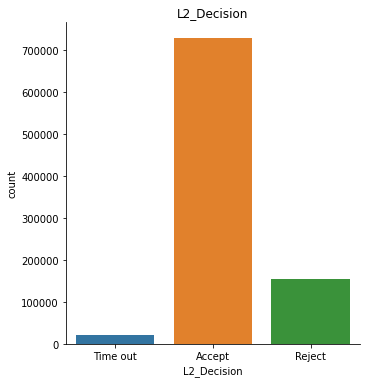

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(x="L2_Decision", kind="count", data=l2)
plt.title('L2_Decision')

**Corealtion**

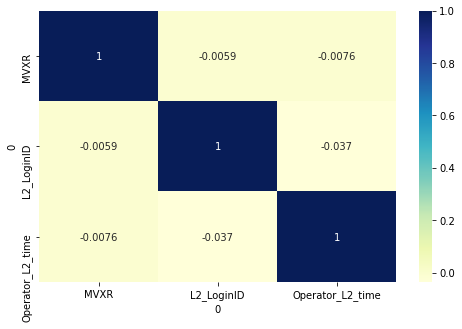

In [ ]:
plt.figure(figsize=(8,5))
corelation = l2.corr() 
sns.heatmap(corelation, xticklabels=corelation.columns,
            yticklabels=corelation.columns,cmap="YlGnBu",annot=True)

In [ ]:
l2.shape

(904424, 5)

**Checking the number of bags got accepted by L2 Operators but took leass than and equal to 25 seconds**

In [ ]:
l2_accept_less_25 = l2[l2.L2_Decision == 'Accept']
l2_accept_less_25 = l2_accept_less_25[l2_accept_less_25.Operator_L2_time <= 25]
l2_accept_less_25.shape

(679255, 5)

**Checking the number of bags got accepted by L2 Operators but took more than 25 seconds**

In [ ]:
l2_accept_more_25 = l2[l2.L2_Decision == 'Accept']
l2_accept_more_25 = l2_accept_more_25[l2_accept_more_25.Operator_L2_time > 25]
l2_accept_more_25.shape

(50970, 5)

In [ ]:
l2_accept_more_25['L2_Decision'] = l2_accept_more_25['L2_Decision'].replace(['Accept'], 'Late_Accepted')
l2_accept_more_25.head()

,Operator_L2_time,MVXR,L2_Decision,L2_LoginID,Aircraft_id
31,28,2,Late_Accepted,31230,0312
38,27,2,Late_Accepted,32648,0312
40,26,3,Late_Accepted,31230,0775
75,27,2,Late_Accepted,32153,0312
87,26,2,Late_Accepted,32878,0312


**Checking the number of bags got rejected by L2 Operators**

In [ ]:
l2_reject = l2[l2.L2_Decision == 'Reject']

In [ ]:
l2_reject.shape

(154151, 5)

In [ ]:
l2_reject_less_25 = l2[l2.L2_Decision == 'Reject']
l2_reject_less_25 = l2_reject_less_25[l2_reject_less_25.Operator_L2_time <= 25]
l2_reject_less_25.shape

(140181, 5)

**Checking the number of bags got Timed out by L2 Operators**

In [ ]:
l2_timeout = l2[l2.L2_Decision == 'Time out']

In [ ]:
l2_timeout.shape

(20079, 5)

**Creating a new dataframe**

In [ ]:
df_l2 = l2_accept_less_25.append([l2_accept_more_25,l2_reject, l2_timeout])
df_l2 = df_l2.sample(frac=1, axis=0)
df_l2.head()

,Operator_L2_time,MVXR,L2_Decision,L2_LoginID,Aircraft_id
1200,2,2,Accept,30921,0312
209975,18,1,Accept,30921,0228
838072,12,2,Accept,31388,0312
46366,26,1,Reject,32648,0312
396916,26,3,Late_Accepted,32887,0775


**Taking 3% of sample data for modeling**

In [ ]:
rows = l2.sample(frac =.05)
rows.head(5)

,l2_decision,L2_LoginID,Operator_L2_time,Aircraft_id
234862,Excellent_operator,31225,8,0312
410378,Normal_operator,32663,25,0312
223357,Good_operator,32149,11,0312
678884,Good_operator,19161,12,0312
548918,Normal_operator,2918,21,0807


In [ ]:
rows.shape

(45221, 4)

# **Modelling**

In [ ]:
##################### Traget & Predictors
X = rows.iloc[:,1:].values
y = rows.iloc[:,0].values

In [ ]:
##################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# **Multinomial**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",n_jobs=-1,max_iter=130)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=130,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
Prediction = pd.DataFrame(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2128,   12,    0,    0],
       [   9, 3509,   52,    0],
       [   0,   14, 2395,   61],
       [   0,    0,   75,  790]])

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.9753454947484799


In [ ]:
X_pred = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_train, X_pred))

Accuracy is :  0.9779135338345865


# **L3 Operators dataset**

In [ ]:
l3.head()

,BagID,MVXR,BHSID,L2_Decision,L2_LoginID,L2_Decision_Time,L3_Decision,L3_LoginID,L3_Decision_Time
0,5178,2,0312365478_0280SD,Time out,32661,1/1/2020 0:16:46,Reject,32887,1/1/2020 0:16:54
1,5180,2,0312365545_0282SD,Accept,32661,1/1/2020 0:19:41,-,-,-
2,5187,2,0312365871_0293SD,Accept,32153,1/1/2020 0:24:44,-,-,-
3,5189,2,0312365971_0296SD,Accept,32153,1/1/2020 0:28:42,-,-,-
4,5196,2,0312366152_0304SD,Accept,32153,1/1/2020 0:33:47,-,-,-


In [ ]:
l3.isnull().sum()

0
BagID                   0
MVXR                    0
BHSID                   6
L2_Decision             0
L2_LoginID          33283
L2_Decision_Time        0
L3_Decision             0
L3_LoginID           1798
L3_Decision_Time        0
dtype: int64

In [ ]:
l3 = l3.dropna()
################## Removing "-" from the columns & checking unique values again
l3 = l3[l3.L3_Decision != '-']
l3.head()

,BagID,MVXR,BHSID,L2_Decision,L2_LoginID,L2_Decision_Time,L3_Decision,L3_LoginID,L3_Decision_Time
0,5178,2,0312365478_0280SD,Time out,32661,1/1/2020 0:16:46,Reject,32887,1/1/2020 0:16:54
8,5210,2,0312367064_0326SD,Reject,32878,1/1/2020 1:03:21,Accept,32887,1/1/2020 1:04:03
9,5212,2,0312367151_0331SD,Reject,32878,1/1/2020 1:10:36,Reject,5525,1/1/2020 1:10:45
12,5226,2,0312340132_0351SD,Reject,31230,1/1/2020 1:17:15,Reject,5525,1/1/2020 1:17:24
14,5230,2,0312343996_0362SD,Time out,31230,1/1/2020 1:24:36,Accept,32887,1/1/2020 1:25:00


In [ ]:
l3.BagID = l3.BagID.astype('int64')
l3.MVXR = l3.MVXR.astype('int64')
l3.L2_LoginID = l3.L2_LoginID.astype('int64')
l3.L3_LoginID = l3.L3_LoginID.astype('int64')
l3['L2_Decision_Time']= pd.to_datetime(l3['L2_Decision_Time'])
l3['L3_Decision_Time']= pd.to_datetime(l3['L3_Decision_Time'], errors='coerce')

l3.dtypes

################## L2 time & L3 time
l3['Operators_L3_time'] = (l3['L3_Decision_Time'] - l3['L2_Decision_Time']).dt.seconds

################## Fetching first 4 letters
l3['Aircraft_id'] = l3['BHSID'].astype(str).str[0:4]

In [ ]:
l3.shape

(201572, 11)

In [ ]:
l3.head()

,BagID,MVXR,BHSID,L2_Decision,L2_LoginID,L2_Decision_Time,L3_Decision,L3_LoginID,L3_Decision_Time,Operators_L3_time,Aircraft_id
0,5178,2,0312365478_0280SD,Time out,32661,2020-01-01 00:16:46,Reject,32887,2020-01-01 00:16:54,8,0312
8,5210,2,0312367064_0326SD,Reject,32878,2020-01-01 01:03:21,Accept,32887,2020-01-01 01:04:03,42,0312
9,5212,2,0312367151_0331SD,Reject,32878,2020-01-01 01:10:36,Reject,5525,2020-01-01 01:10:45,9,0312
12,5226,2,0312340132_0351SD,Reject,31230,2020-01-01 01:17:15,Reject,5525,2020-01-01 01:17:24,9,0312
14,5230,2,0312343996_0362SD,Time out,31230,2020-01-01 01:24:36,Accept,32887,2020-01-01 01:25:00,24,0312


In [ ]:
l3 = l3.drop(['BagID','BHSID','L2_Decision', 'L3_Decision','L2_Decision_Time','L3_Decision_Time','MVXR','L2_LoginID'],axis=1)
l3.head()

,L3_LoginID,Operators_L3_time,Aircraft_id
0,32887,8,0312
8,32887,42,0312
9,5525,9,0312
12,5525,9,0312
14,32887,24,0312


In [ ]:
################### Creating bins
bins = [0, 20, 40, 60, 100]
labels = ["Excellent_operator","Good_operator","Normal_operator","Worst_operator"]
l3['l3_decision'] = pd.cut(l3['Operators_L3_time'], bins=bins, labels=labels)

In [ ]:
l3.isnull().sum()

0
L3_LoginID            0
Operators_L3_time     0
Aircraft_id           0
l3_decision          32
dtype: int64

In [ ]:
l3 = l3.dropna()

In [ ]:
# Shift column 'Operator_L2_time' to first position
first_column = l3.pop('l3_decision')
  
# insert column to first in data frame 
l3.insert(0, 'l3_decision', first_column)

In [ ]:
l3.isnull().sum()

0
l3_decision          0
L3_LoginID           0
Operators_L3_time    0
Aircraft_id          0
dtype: int64

In [ ]:
################## Removing "-" from the columns & checking unique values again
l3 = l3[l3.Aircraft_id != 'MVXR']
l3 = l3[l3.Aircraft_id != '0000']
l3.shape

(174429, 4)

In [ ]:
rows = l3.sample(frac =.15)
rows.head(5)

,l3_decision,L3_LoginID,Operators_L3_time,Aircraft_id
132571,Good_operator,32652,31,0775
9555,Excellent_operator,31388,14,0001
621563,Good_operator,33687,35,0312
925067,Excellent_operator,18183,19,0312
811707,Excellent_operator,32878,10,0312


In [ ]:
##################### Traget & Predictors
X1 = rows.iloc[:,1:]
y1 = rows.iloc[:,0]

In [ ]:
##################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",n_jobs=-1,max_iter=150)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
Prediction = pd.DataFrame(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2554,    0,    0,    0],
       [   0, 1712,   16,    0],
       [   0,    9,  822,    0],
       [   0,    0,   92,   28]])

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.9776418880183451


In [ ]:
X_pred = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_train, X_pred))

Accuracy is :  0.976111987004921


# **All records**

# **L2 Dataset**

In [ ]:
##################### Traget & Predictors
X = l2.iloc[:,1:].values
y = l2.iloc[:,0].values

In [ ]:
##################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",n_jobs=-1,max_iter=130)
classifier.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17569,     0,     0,     0],
       [    4, 11001,    51,     0],
       [    0,    76,  5238,     0],
       [    0,     0,   640,   307]])

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.9778994439029983


In [ ]:
X_pred = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_train, X_pred))

Accuracy is :  0.9781071067699563


# **L3 Dataset**

In [ ]:
##################### Traget & Predictors
X = l3.iloc[:,1:].values
y = l3.iloc[:,0].values

In [ ]:
##################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",n_jobs=-1,max_iter=150)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17569,     0,     0,     0],
       [    4, 11001,    51,     0],
       [    0,    76,  5238,     0],
       [    0,     0,   640,   307]])

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.9778994439029983


In [ ]:
X_pred = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy is : ", accuracy_score(y_train, X_pred))

Accuracy is :  0.9781071067699563
